In [1]:
%run cifar10_CNN.ipynb

Num GPUs Available:  1


In [2]:
trainX_norm, trainY, testX_norm, testY = load_and_center()
# trainX_norm, trainY, testX_norm, testY = load_and_normalize()

Training Set: X: (50000, 32, 32, 3), y: (50000, 10)
Testing Set: X: (10000, 32, 32, 3), y: (10000, 1)


Training base1 model
Training takes 4.15 minutes
> Testing accuracy - base1: 66.59%
Saving model...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/base1/assets
Model Saved


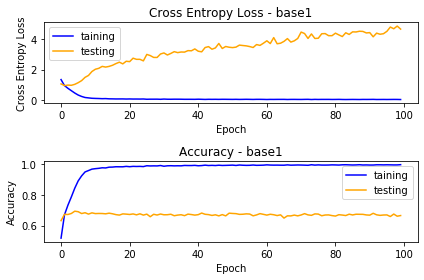

In [3]:
model_base1 = train_and_validate(build_model_base1, trainX_norm, trainY, testX_norm, testY)

In [ ]:
model_base2 = train_and_validate(build_model_base2, trainX_norm, trainY, testX_norm, testY)

In [ ]:
model_base3 = train_and_validate(build_model_base3, trainX_norm, trainY, testX_norm, testY)

Training VGG3_bn model
Training takes 7.018 minutes
> Testing accuracy - VGG3_bn: 82.37%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_bn/assets
Model Saved


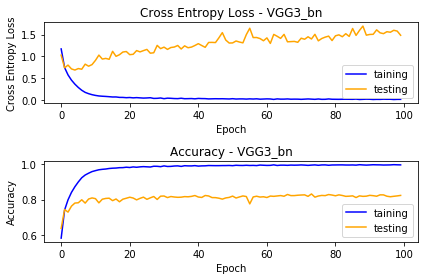

In [4]:
model_VGG3_bn = train_and_validate(build_model_VGG3_bn, trainX_norm, trainY, testX_norm, testY)

Training VGG3_l2 model
Training takes 6.487 minutes
> Testing accuracy - VGG3_l2: 75.56%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_l2/assets
Model Saved


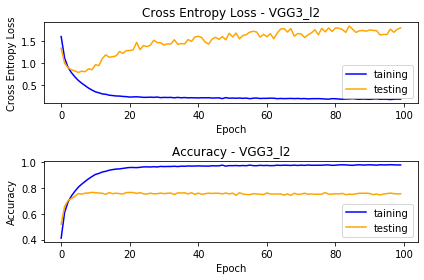

In [5]:
model_VGG3_l2 = train_and_validate(build_model_VGG3_l2, trainX_norm, trainY, testX_norm, testY)

Training VGG3_dropout model
Training takes 6.562 minutes
> Testing accuracy - VGG3_dropout: 79.03999999999999%
Saving model...
INFO:tensorflow:Assets written to: models/VGG3_dropout/assets
Model Saved


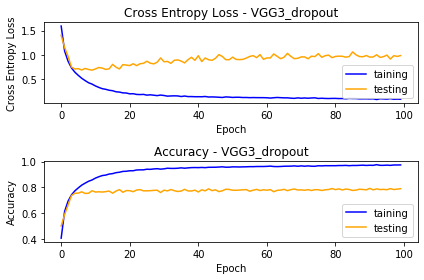

In [6]:
model_VGG3_droout = train_and_validate(build_model_VGG3_dropout, trainX_norm, trainY, testX_norm, testY)

Training augmented_base3 model
Training takes 41.401 minutes
> Testing accuracy - augmented_base3: 84.69%
Saving model...
Model Saved


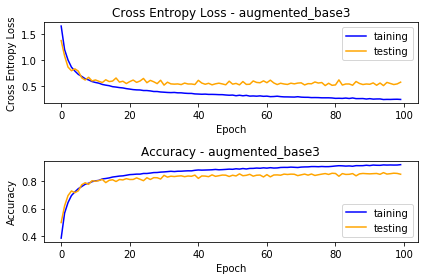

In [3]:
model_augmented_VGG3 = train_and_validate_augmented(build_model_base3, trainX_norm, trainY, testX_norm, testY)

Training augmented_VGG3_final model
Epoch 1/75
781/781 [==============================] - 28s 36ms/step - loss: 2.1331 - accuracy: 0.3298 - val_loss: 1.5136 - val_accuracy: 0.4748
Epoch 2/75
781/781 [==============================] - 27s 35ms/step - loss: 1.5544 - accuracy: 0.4714 - val_loss: 1.4393 - val_accuracy: 0.5403
Epoch 3/75
781/781 [==============================] - 27s 35ms/step - loss: 1.3255 - accuracy: 0.5509 - val_loss: 1.1600 - val_accuracy: 0.6127
Epoch 4/75
781/781 [==============================] - 27s 35ms/step - loss: 1.1943 - accuracy: 0.5974 - val_loss: 1.0679 - val_accuracy: 0.6505
Epoch 5/75
781/781 [==============================] - 27s 35ms/step - loss: 1.0967 - accuracy: 0.6358 - val_loss: 1.0252 - val_accuracy: 0.6608
Epoch 6/75
781/781 [==============================] - 27s 35ms/step - loss: 1.0264 - accuracy: 0.6616 - val_loss: 1.0092 - val_accuracy: 0.6771
Epoch 7/75
781/781 [==============================] - 27s 35ms/step - loss: 0.9690 - accuracy: 0.685

781/781 [==============================] - 27s 35ms/step - loss: 0.5212 - accuracy: 0.8584 - val_loss: 0.5338 - val_accuracy: 0.8589
Epoch 58/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5211 - accuracy: 0.8584 - val_loss: 0.5067 - val_accuracy: 0.8662
Epoch 59/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5181 - accuracy: 0.8607 - val_loss: 0.5178 - val_accuracy: 0.8628
Epoch 60/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5204 - accuracy: 0.8592 - val_loss: 0.5578 - val_accuracy: 0.8538
Epoch 61/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5155 - accuracy: 0.8608 - val_loss: 0.5255 - val_accuracy: 0.8632
Epoch 62/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5194 - accuracy: 0.8610 - val_loss: 0.5215 - val_accuracy: 0.8621
Epoch 63/75
781/781 [==============================] - 27s 35ms/step - loss: 0.5180 - accuracy: 0.8605 - val_loss: 0.5534 - val_accuracy: 0.85

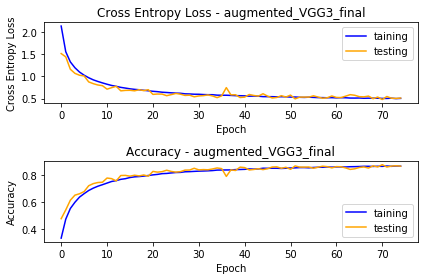

In [3]:
final_model = train_and_validate_augmented(build_model_VGG3_final, trainX_norm, trainY, testX_norm, testY)

In [4]:
final_model.save('models/augmented_VGG3_final/augmented_VGG3_centered_3_75.h5')

In [7]:
opt = Adam(lr=0.0001)
final_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
steps = trainX_norm.shape[0] // 64
history = final_model.fit(datagen.flow(trainX_norm, trainY, batch_size=64), steps_per_epoch=steps, epochs=25, validation_data=(testX_norm, testY), verbose=1)

Epoch 1/25
781/781 [==============================] - 27s 35ms/step - loss: 0.4040 - accuracy: 0.9060 - val_loss: 0.4550 - val_accuracy: 0.8969
Epoch 2/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3926 - accuracy: 0.9097 - val_loss: 0.4431 - val_accuracy: 0.9016
Epoch 3/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3818 - accuracy: 0.9132 - val_loss: 0.4368 - val_accuracy: 0.9017
Epoch 4/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3853 - accuracy: 0.9115 - val_loss: 0.4307 - val_accuracy: 0.9031
Epoch 5/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3762 - accuracy: 0.9128 - val_loss: 0.4507 - val_accuracy: 0.8979
Epoch 6/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3768 - accuracy: 0.9138 - val_loss: 0.4332 - val_accuracy: 0.9029
Epoch 7/25
781/781 [==============================] - 27s 34ms/step - loss: 0.3767 - accuracy: 0.9122 - val_loss: 0.4238 - val_accuracy:

In [8]:
final_model.save('models/augmented_VGG3_normalized_3_250_1_25.h5')

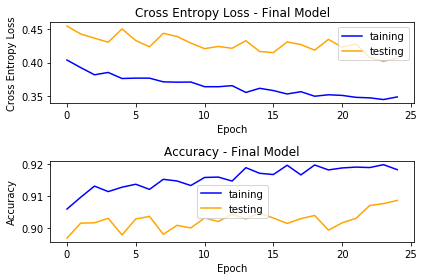

In [11]:
fig, ax = plt.subplots(2, 2)
plt.subplot(211)
plt.plot(history.history['loss'], color='blue', label='taining')
plt.plot(history.history['val_loss'], color='orange', label='testing')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss - Final Model' )
plt.legend()
plt.subplot(212)
plt.plot(history.history['accuracy'], color='blue', label='taining')
plt.plot(history.history['val_accuracy'], color='orange', label='testing')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy - Final Model')
plt.legend()

fig.tight_layout()
plt.savefig('models/augmented_VGG3_normalized_3_250_1_25_plot.png', dpi=300)
plt.show()
plt.close()